# Supervised Learning and K Nearest Neighbors Exercises

## Introduction

We will be using customer churn data from the telecom industry for the first week's exercises. The data file is called 
`Orange_Telecom_Churn_Data.csv`. We will load this data together, do some preprocessing, and use K-nearest neighbors to predict customer churn based on account characteristics.

In [56]:
from __future__ import print_function
import os
import re
import string
import pandas as pd
import numpy as np
import nltk
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as pylt
%matplotlib inline

## Question 1

* Begin by importing the data. Examine the columns and data.
* Notice that the data contains a state, area code, and phone number. Do you think these are good features to use when building a machine learning model? Why or why not? 

We will not be using them, so they can be dropped from the data.

In [81]:
data = pd.read_csv('data/data/Orange_Telecom_Churn_Data.csv')
data.head(10)

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [82]:
print("Number of Columns-",len(data.columns))
print("Number of Rows-",len(data))
list(data.columns.values)

Number of Columns- 21
Number of Rows- 5000


['state',
 'account_length',
 'area_code',
 'phone_number',
 'intl_plan',
 'voice_mail_plan',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge',
 'number_customer_service_calls',
 'churned']

### Columns like state, area_code and phone_number are not quantitative variables and hence are not good features while using distance based model like K nearest neighbours. They cannot be considered as categorical variables too as they will have numerous categories. Hence they have to dropped.

In [83]:
data = data.drop(['state', 'area_code','phone_number'], axis=1)
print("Number of Columns-",len(data.columns))
print("Number of Rows-",len(data))
list(data.columns.values)


Number of Columns- 18
Number of Rows- 5000


['account_length',
 'intl_plan',
 'voice_mail_plan',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge',
 'number_customer_service_calls',
 'churned']

## Question 2

* Notice that some of the columns are categorical data and some are floats. These features will need to be numerically encoded using one of the methods from the lecture.
* Finally, remember from the lecture that K-nearest neighbors requires scaled data. Scale the data using one of the scaling methods discussed in the lecture.

In [84]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
account_length                   5000 non-null int64
intl_plan                        5000 non-null object
voice_mail_plan                  5000 non-null object
number_vmail_messages            5000 non-null int64
total_day_minutes                5000 non-null float64
total_day_calls                  5000 non-null int64
total_day_charge                 5000 non-null float64
total_eve_minutes                5000 non-null float64
total_eve_calls                  5000 non-null int64
total_eve_charge                 5000 non-null float64
total_night_minutes              5000 non-null float64
total_night_calls                5000 non-null int64
total_night_charge               5000 non-null float64
total_intl_minutes               5000 non-null float64
total_intl_calls                 5000 non-null int64
total_intl_charge                5000 non-null float64
number_customer_service_cal

In [85]:
data["intl_plan"]=data.intl_plan.map(dict(yes=1, no=0))
data["voice_mail_plan"]=data.voice_mail_plan.map(dict(yes=1, no=0))
data[['churned']] = data.churned.astype(int)

In [86]:
convert = ['churned','total_day_minutes','total_day_charge','total_eve_minutes','total_eve_charge','total_night_minutes','total_night_charge','total_intl_minutes','total_intl_charge']
data[convert] = data[convert].applymap(np.int64)

In [87]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
account_length                   5000 non-null int64
intl_plan                        5000 non-null int64
voice_mail_plan                  5000 non-null int64
number_vmail_messages            5000 non-null int64
total_day_minutes                5000 non-null int64
total_day_calls                  5000 non-null int64
total_day_charge                 5000 non-null int64
total_eve_minutes                5000 non-null int64
total_eve_calls                  5000 non-null int64
total_eve_charge                 5000 non-null int64
total_night_minutes              5000 non-null int64
total_night_calls                5000 non-null int64
total_night_charge               5000 non-null int64
total_intl_minutes               5000 non-null int64
total_intl_calls                 5000 non-null int64
total_intl_charge                5000 non-null int64
number_customer_service_calls    5000 non-nul

In [88]:
# Scaling the data
scale = StandardScaler()
data1 =  scale.fit_transform(data.drop("churned",axis=1))
data1 = pd.DataFrame(data1)
data1["churned"] = data["churned"]
data1.columns = data.columns
data = data1

C:\Users\meena\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\meena\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


## Question 3

* Separate the feature columns (everything except `churned`) from the label (`churned`). This will create two tables.
* Fit a K-nearest neighbors model with a value of `k=3` to this data and predict the outcome on the same data.

In [89]:
dataX = data.drop("churned",axis=1)
dataY = data["churned"].values

In [90]:
knnclassifier = KNeighborsClassifier(n_neighbors = 3) 
knnclassifier.fit(dataX,dataY)
prediction = knnclassifier.predict(dataX)


## Question 4

Ways to measure error haven't been discussed in class yet, but accuracy is an easy one to understand--it is simply the percent of labels that were correctly predicted (either true or false). 

* Write a function to calculate accuracy using the actual and predicted labels.
* Using the function, calculate the accuracy of this K-nearest neighbors model on the data.

In [91]:
def accuracy(actual, prediction):
    cmat = confusion_matrix(actual, prediction)
    acc = np.sum(cmat.diagonal()) / np.sum(cmat)
    print('Accuracy: {} %'.format(acc*100))

In [92]:
accuracy(dataY, prediction)

Accuracy: 93.8 %


## Question 5

* Fit the K-nearest neighbors model again with `n_neighbors=3` but this time use distance for the weights. Calculate the accuracy using the function you created above. 
* Fit another K-nearest neighbors model. This time use uniform weights but set the power parameter for the Minkowski distance metric to be 1 (`p=1`) i.e. Manhattan Distance.

When weighted distances are used for part 1 of this question, a value of 1.0 should be returned for the accuracy. Why do you think this is? *Hint:* we are predicting on the data and with KNN the model *is* the data. We will learn how to avoid this pitfall in the next lecture.

In [93]:
knnclassifier = KNeighborsClassifier(n_neighbors = 3, weights ='distance')
knnclassifier.fit(dataX, dataY)
prediction = knnclassifier.predict(dataX)
accuracy(dataY, prediction)

Accuracy: 100.0 %


In [94]:
knnclassifier = KNeighborsClassifier(n_neighbors = 3, weights ='uniform',metric = 'minkowski', p = 1)
knnclassifier.fit(dataX, dataY)
prediction = knnclassifier.predict(dataX)
accuracy(dataY, prediction)

Accuracy: 94.0 %


### As we are predicting for the same data which we used for training we are getting 100% accuracy. With unseen data, it will perform badly. Also as weights = distance, neighbours which are closer will have a bigger influence i.e the point itself. All this causes overfitting. Training accuracy will be more but test accuracy will be less.

## Question 6

* Fit a K-nearest neighbors model using values of `k` (`n_neighbors`) ranging from 1 to 20. Use uniform weights (the default). The coefficient for the Minkowski distance (`p`) can be set to either 1 or 2--just be consistent. Store the accuracy and the value of `k` used from each of these fits in a list or dictionary.
* Plot (or view the table of) the `accuracy` vs `k`. What do you notice happens when `k=1`? Why do you think this is? *Hint:* it's for the same reason discussed above.

In [95]:
krange = range(1, 20)
acc_score = []
k_value = []

for k in krange:
    knnclassifier = KNeighborsClassifier(n_neighbors=k, weights ='uniform',metric = 'minkowski', p = 1)
    knnclassifier.fit(dataX, dataY)
    prediction = knnclassifier.predict(dataX)
    acc_score.append(accuracy_score(dataY, prediction))
    k_value.append(k)
    
print(acc_score)

[1.0, 0.926, 0.94, 0.9148, 0.9304, 0.9122, 0.924, 0.9054, 0.9146, 0.9002, 0.9104, 0.8998, 0.9062, 0.8966, 0.9018, 0.8958, 0.8998, 0.8924, 0.8986]


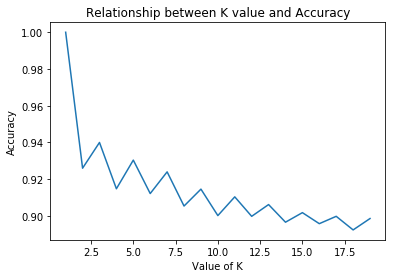

In [96]:
pylt.plot(k_value, acc_score)
pylt.xlabel('Value of K')
pylt.ylabel('Accuracy')
pylt.title("Relationship between K value and Accuracy")
pylt.show()

### When K=1 in KNN, we get 100% accuracy as the values are already seen by the model and a rough decision boundary is formed for K=1(the point itself will have greater influence). With unseen data, K=1 may perform badly so it is important to choose the optimal K value which would give lowest error without overfitting. 